# Principal Component Analysis: Introduction and Applications

**Machine Learning**

*Creado por: Hernán Felipe García Arias*

Adapatado por: Jonnatan Arias Garcia

*Facultad de Ingeniería*

*UTP*

*Uniquindio*

**2024**


En este tutorial, exploramos lo que quizás sea uno de los algoritmos no supervisados más ampliamente utilizados, el análisis de componentes principales (PCA).

PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como una herramienta para visualización, filtrado de ruido, extracción y mucho más. Después de una breve discusión conceptual del PCA, veremos más aplicaciones.

Comenzamos con las importaciones estándar:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Presentando el Análisis de Componentes Principales

El análisis de componentes principales es un método no supervisado rápido y flexible para la reducción de la dimensionalidad en los datos.

Su comportamiento es más fácil de visualizar al observar un conjunto de datos bidimensional. Considera los siguientes 200 puntos:

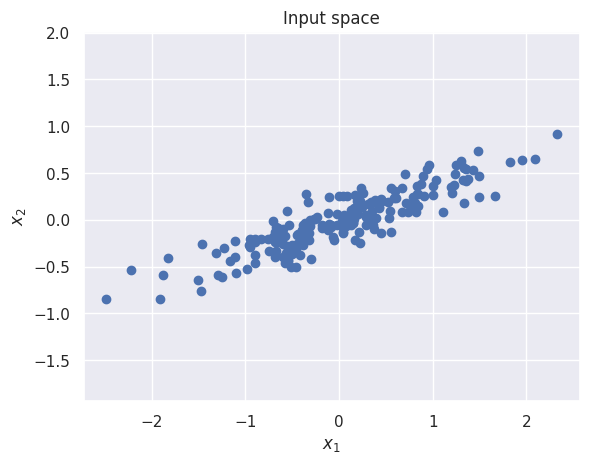

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.title('Input space')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.axis('equal');

A simple vista, es claro que existe una relación casi lineal entre las variables x e y. El problema planteado aquí es: en lugar de intentar predecir los valores de y a partir de los valores de x, el problema de aprendizaje no supervisado intenta aprender sobre la relación entre los valores de x e y.

En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los ejes principales en los datos, y utilizando esos ejes para describir el conjunto de datos.

Utilizando el estimador PCA de Scikit-Learn, podemos calcular esto de la siguiente manera:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
print(X.shape)

(200, 2)


El modelo aprende algunas cantidades de los datos, lo más importante son los "componentes" y la "varianza explicada":

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para entender qué significan estos números, visualicémoslos como vectores sobre los datos de entrada, utilizando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector:

Lambdas: [0.7625315 0.0184779]
mean:  [ 0.03351168 -0.00408072]


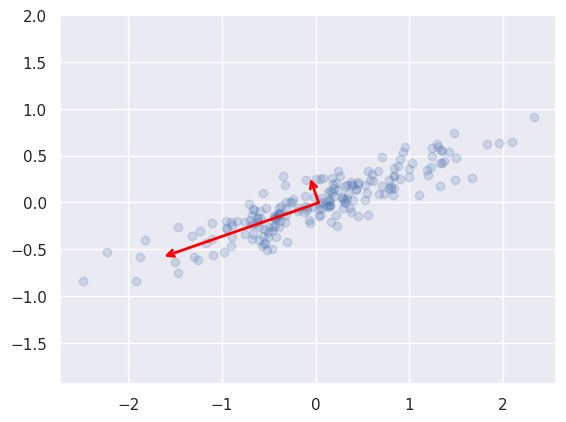

In [14]:
from ipywidgets.widgets.widget_int import Color
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,color='red',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2. * np.sqrt(length)
    #draw_vector(v*0.,  v)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
print('Lambdas:',pca.explained_variance_)
print('mean: ',pca.mean_)

Estos vectores representan los ejes principales de los datos, y la longitud del vector es una indicación de cuán "importante" es ese eje para describir la distribución de los datos, más precisamente, es una medida de la varianza de los datos cuando se proyectan en ese eje. La proyección de cada punto de datos en los ejes principales son los "componentes principales" de los datos.

Si graficamos estos componentes principales junto a los datos originales, veremos las gráficas mostradas aquí:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-PCA-rotation.png?raw=1)



Esta transformación de ejes de datos a ejes principales es una transformación afín, lo que básicamente significa que está compuesta por una traslación, rotación y escalamiento uniforme.

Si bien este algoritmo para encontrar componentes principales puede parecer solo una curiosidad matemática, resulta tener aplicaciones muy amplias en el mundo del aprendizaje automático y la exploración de datos.

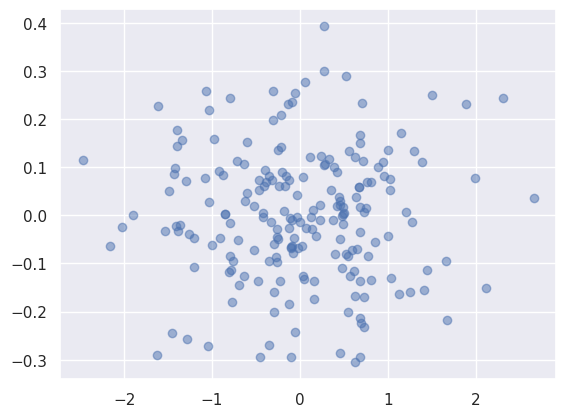

In [21]:
Z = pca.transform(X)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)

### PCA como reducción de dimensionalidad
Utilizar PCA para la reducción de dimensionalidad implica anular uno o más de los componentes principales más pequeños, lo que resulta en una proyección de menor dimensionalidad de los datos que preserva la máxima varianza de los datos.

Aquí tienes un ejemplo de cómo utilizar PCA como una transformación de reducción de dimensionalidad:

In [22]:
pca = PCA(n_components=1) # Creamos el modelo PCA
pca.fit(X) # Entrenamos el modelo
X_pca = pca.transform(X) # Transformamos los datos al espacio latente
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Para transformar de vuelta al espacio de entrada el conjunto de datos latente  ${\bf{Z}}$ , necesitamos tener en cuenta:


- ${\bf{X}}\in \mathbb{R}^{N\times D}$
- ${\bf{W}}\in \mathbb{R}^{D\times q}$, donde  $q$  son los autovalores más relevantes de $\bf{S}$

- ${\bf{Z}} = {\bf{XW}} $
- $ {\bf{Z}}{\bf{W}}^{-1} = {\bf{XW}}{\bf{W}}^{-1} ={\bf{Z}}{\bf{W}}^{-1} = {\bf{X}}{\bf{I}}$
- $ {\bf{X}}_{reproy} = {\bf{Z}}{\bf{W}}^{-1}$

Los datos transformados se han reducido a una sola dimensión. Para entender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y graficarlos junto con los datos originales:

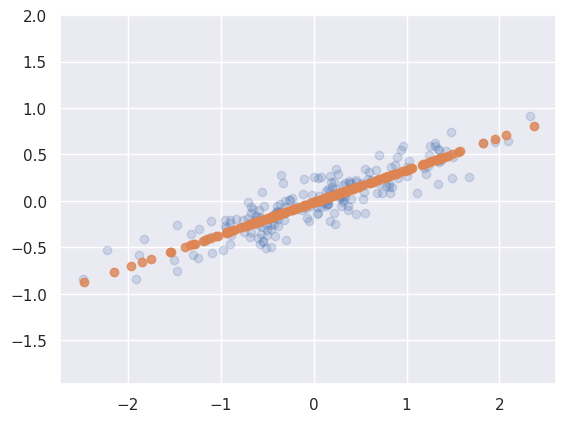

In [23]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Los puntos claros son los datos originales, mientras que los puntos oscuros son la versión proyectada. Esto deja en claro lo que significa la reducción de dimensionalidad mediante PCA: se elimina la información a lo largo del eje o ejes principales menos importantes, dejando solo el o los componentes de los datos con la mayor varianza. La fracción de varianza que se elimina (proporcional a la dispersión de los puntos alrededor de la línea formada en esta figura) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensiones reducidas es, en cierto sentido, "suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 50%, la relación general entre los puntos de datos se conserva en su mayoría.

### PCA para visualización: Dígitos escritos a mano

La utilidad de la reducción de dimensionalidad puede que no sea del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara al observar datos de alta dimensionalidad. Para ver esto, echemos un vistazo rápido a la aplicación de PCA a los datos de dígitos:

Comenzamos cargando los datos:

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
N, D = digits.data.shape
print('# Observations: ', N,'\t# Features: ',D)

# Observations:  1797 	# Features:  64


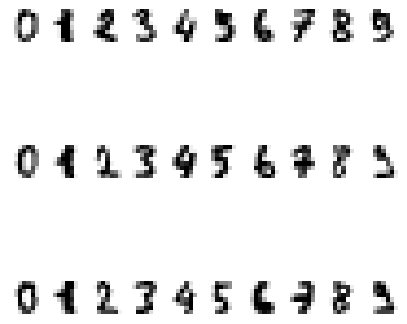

In [25]:
#Display the first ten digits
fig, axs = plt.subplots(3,10, figsize=(5, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()
for nDigit in range(30):
  digitImg = digits.images[nDigit]
  axs[nDigit].imshow(digitImg, cmap=plt.cm.gray_r, interpolation='nearest')
  axs[nDigit].axis('off')
plt.show()

Recuerda que los datos consisten en imágenes de píxeles de 8x8, lo que significa que son de 64 dimensiones. Para tener una idea de las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, digamos dos:

Input Space: (1797, 64)
Latent Space: (1797, 64)
[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.142

Text(0.5, 1.0, 'Var explained normalized')

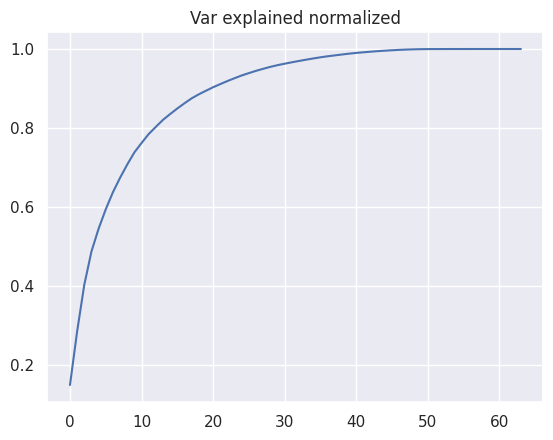

In [26]:
pca = PCA(n_components = 64)  # project from 64 to 2 dimensions
# Load our dataset X
X = digits.data
projectedZ = pca.fit_transform(X)
BasisW = pca.components_
print('Input Space:',digits.data.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Var explained normalized')

Podemos ahora graficar los dos primeros componentes principales de cada punto para aprender sobre los datos.

<ipython-input-27-d9e4ba29bde7>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


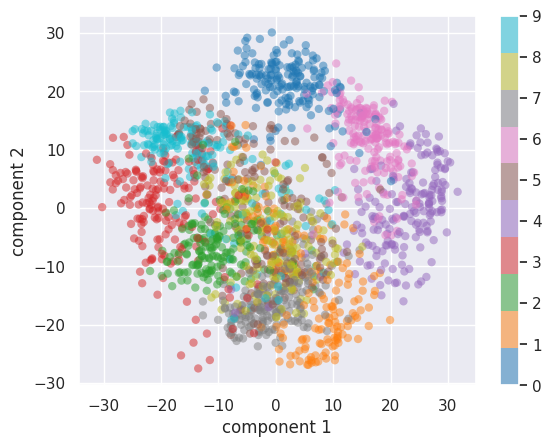

In [27]:
plt.scatter(projectedZ[:, 0], projectedZ[:, 1],
             c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

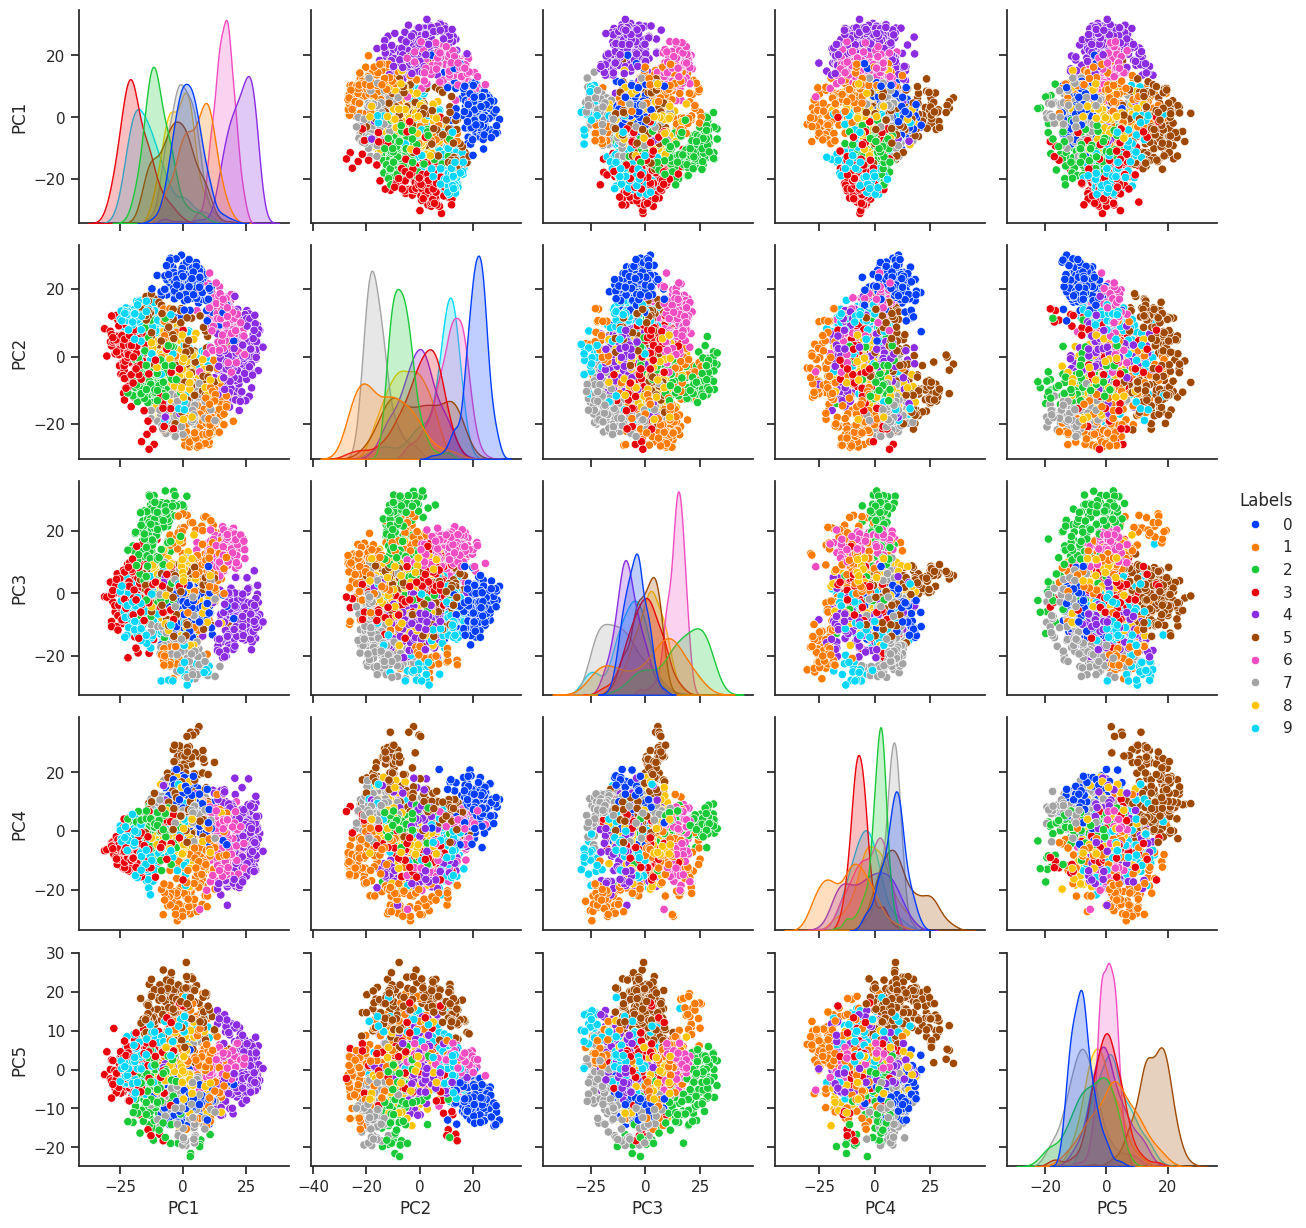

In [28]:
# Misma versión con Pandas
import pandas as pd
import seaborn as sns
X_prueba = projectedZ[:,:5]
y = digits.target

dataFrame = pd.DataFrame(X_prueba,columns=['PC1','PC2','PC3','PC4','PC5'])
dataFrame['Labels'] = y
sns.set_theme(style="ticks")
sns.pairplot(dataFrame, hue= 'Labels',palette='bright')



Recuerda lo que significan estos componentes: los datos completos son una nube de puntos de 64 dimensiones, y estos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor varianza. Básicamente, hemos encontrado la elongación y rotación óptimas en el espacio de 64 dimensiones que nos permiten ver la disposición de los dígitos en dos dimensiones, y hemos hecho esto de manera no supervisada, es decir, sin hacer referencia a las etiquetas.

### ¿Qué significan los componentes?
Podemos ir un poco más allá aquí, y empezar a preguntarnos qué significan las dimensiones reducidas. Este significado se puede entender en términos de combinaciones de vectores base. Por ejemplo, cada imagen en el conjunto de entrenamiento está definida por una colección de 64 valores de píxeles, que llamaremos el vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Una forma en que podemos pensar en esto es en términos de píxeles. Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe, y luego sumamos los resultados para construir la imagen:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Una forma en la que podríamos reducir la dimensión de estos datos es poner a cero todos menos unos pocos de estos vectores base. Por ejemplo, si solo usamos los primeros ocho píxeles, obtenemos una proyección de ocho dimensiones de los datos, ¡pero no refleja mucho la imagen completa: hemos descartado casi el 90% de los píxeles!

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pixel-components.png?raw=1)


La fila superior de paneles muestra los píxeles individuales, y la fila inferior muestra la contribución acumulativa de estos píxeles a la construcción de la imagen. Utilizando solo ocho de los componentes de base de píxeles, solo podemos construir una pequeña parte de la imagen de 64 píxeles. Si continuáramos esta secuencia y usáramos los 64 píxeles, recuperaríamos la imagen original.

Pero la representación píxel a píxel no es la única opción de base. También podemos usar otras funciones de base, que contienen una contribución predefinida de cada píxel, y escribir algo así.

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA se puede pensar como un proceso de elegir funciones de base óptimas, de modo que al sumar solo las primeras de ellas es suficiente para reconstruir adecuadamente la mayoría de los elementos en el conjunto de datos. Los componentes principales, que actúan como la representación de baja dimensión de nuestros datos, son simplemente los coeficientes que multiplican cada uno de los elementos en esta serie. Esta figura muestra una representación similar de reconstruir este dígito usando la media más las primeras ocho funciones de base de PCA.

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.09-digits-pca-components.png?raw=1)


A diferencia de la base de píxeles, la base de PCA nos permite recuperar las características más importantes de la imagen de entrada con solo una media más ocho componentes. La cantidad de cada píxel en cada componente es el resultado de la orientación del vector en nuestro ejemplo bidimensional. En este sentido, PCA proporciona una representación de baja dimensión de los datos: descubre un conjunto de funciones de base que son más eficientes que la base de píxeles nativa de los datos de entrada.

In [29]:
from ipywidgets import interact

In [30]:
@interact(Q = (2,64),NumIm = (1,1500),LatentId = (1,64))
def PCA_Rec(Q, NumIm,LatentId):
  # Reconstruction from the Latent Space
  pca = PCA(n_components = Q)  # project from 64 to 2 dimensions
  # Load our dataset X
  X = digits.data
  # Enviamos al latent space (input to latent)
  projectedZ = pca.fit_transform(X)
  Basis = pca.components_
  print(Basis.shape)
  print(digits.data.shape)
  print(projectedZ.shape)
  print(Basis.shape)
  # Projected back to the original space (from latent to input)
  reconstructedX = pca.inverse_transform(projectedZ)

  #Display the first ten digits
  # We select the test digits
  idTest = NumIm
  print('Digit: ',digits.target[idTest])
  digitOrg = X[idTest,:].reshape(8,8)
  digitRec = reconstructedX[idTest,:].reshape(8,8)
  digit_Z = Basis[LatentId,:].reshape(8,8)
  fig, axs = plt.subplots(1,3, figsize=(10, 10), facecolor='w', edgecolor='k')
  axs = axs.ravel()
  axs[0].imshow(digitOrg, cmap=plt.cm.gray_r, interpolation='nearest')
  axs[0].title.set_text('Input Data: x')
  axs[0].axis('off')
  axs[1].title.set_text('Reconstructed Data from: z')
  axs[1].imshow(digitRec, cmap=plt.cm.gray_r, interpolation='nearest')
  axs[1].axis('off')
  axs[2].title.set_text('Latent Representation: Q_th component')
  axs[2].imshow(digit_Z, cmap=plt.cm.gray_r, interpolation='nearest')
  axs[2].axis('off')
  plt.show()
  plt.figure()
  plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
  plt.show()

interactive(children=(IntSlider(value=33, description='Q', max=64, min=2), IntSlider(value=750, description='N…

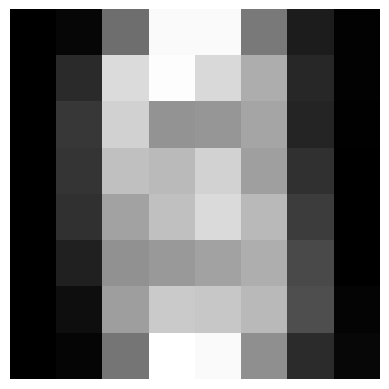

In [31]:
meanX = np.mean(X,axis=0)

imgMeanX = meanX.reshape(8,8)

plt.imshow(imgMeanX,cmap='gray')
plt.axis('off')
plt.show()

### Elegir el número de componentes
Una parte vital de usar PCA en la práctica es la habilidad de estimar cuántos componentes se necesitan para describir los datos. Esto se puede determinar al observar la proporción acumulada de varianza explicada en función del número de componentes:

(64,) 
 Explained variance 0.9590854042457171


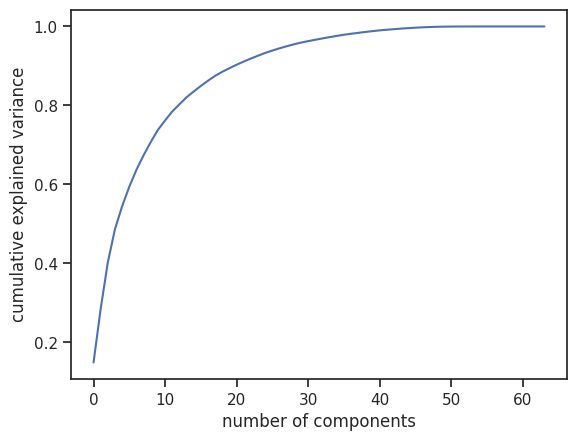

In [32]:
X =digits.data
pca = PCA().fit(X)
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:30]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Esta curva cuantifica cuánto de la varianza total de 64 dimensiones se encuentra dentro de los primeros  N  componentes. Por ejemplo, vemos que con los dígitos, los primeros 10 componentes contienen aproximadamente el 75% de la varianza, mientras que se necesitan alrededor de 50 componentes para describir cerca del 100% de la varianza.

Aquí vemos que nuestra proyección bidimensional pierde mucha información (medida por la varianza explicada) y que necesitaríamos cerca de 20 componentes para retener el 90% de la varianza. Observar este gráfico para un conjunto de datos de alta dimensionalidad puede ayudarte a comprender el nivel de redundancia presente en múltiples observaciones.

## PCA como filtro de ruido
PCA también se puede utilizar como un enfoque de filtrado para datos ruidosos. La idea es la siguiente: cualquier componente con una varianza mucho mayor que el efecto del ruido debería verse relativamente afectado por el ruido. Entonces, si reconstruyes los datos utilizando solo el subconjunto más grande de componentes principales, deberías estar manteniendo preferentemente la señal y desechando el ruido.

Veamos cómo se ve esto con los datos de dígitos. Primero vamos a graficar varios de los datos de entrada sin ruido:

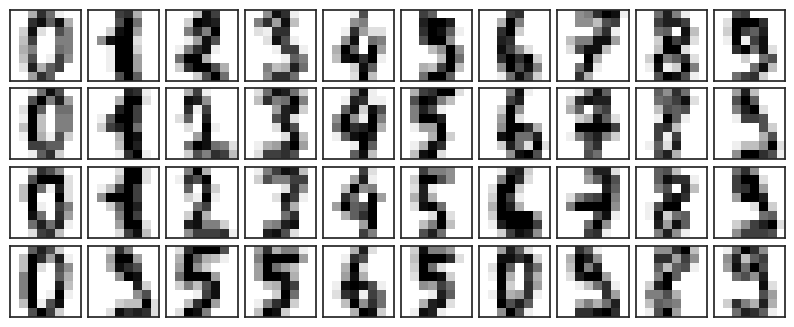

In [33]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ahora vamos a agregar un poco de ruido aleatorio para crear un conjunto de datos ruidoso, y luego lo volvemos a graficar:

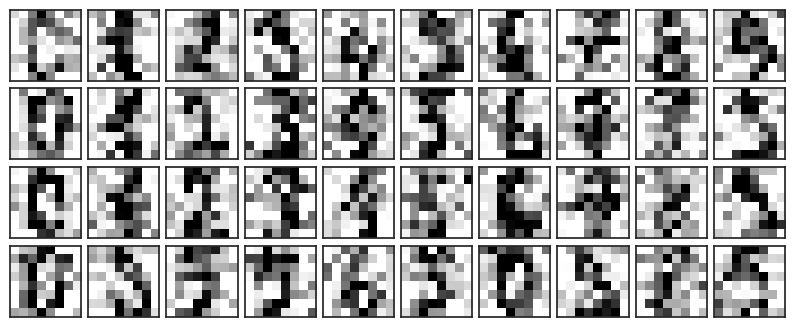

In [34]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 5)
plot_digits(noisy)

Es evidente a simple vista que las imágenes tienen ruido y contienen píxeles espurios.

Vamos a entrenar un PCA con los datos ruidosos, solicitando que la proyección preserve el 50% de la varianza.

In [35]:
# Si le enviamos un flotante entre [0-1], retornará las componentes que retienen
# esa cantidad de varianza
pca = PCA(0.5).fit(noisy)
pca.n_components_

15

Aquí, el 50% de la varianza equivale a 6-12 componentes principales.

Ahora calculamos estos componentes y luego usamos la inversa de la transformación para reconstruir los dígitos filtrados.

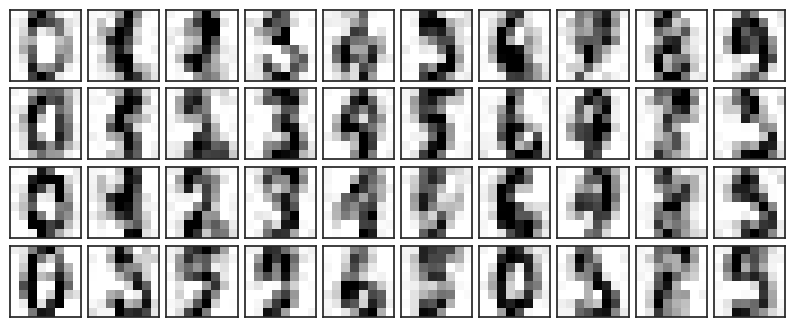

In [36]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Esta propiedad de preservación de la señal/filtrado de ruido hace que el PCA sea un procedimiento de selección de características muy útil, por ejemplo, en lugar de entrenar un clasificador en datos de muy alta dimensionalidad, podrías en su lugar entrenar el clasificador en la representación de menor dimensionalidad, lo que automáticamente servirá para filtrar el ruido aleatorio en las entradas.

## Ejemplo: Eigenfaces

Recordemos:

- Nuestro dataset ${\bf{X}}\in \mathbb{R}^{N\times D}$, donde $N$ es el numero de observaciones, y $D$ el numero de caracteristicas de el dataset.
- uestra tarea es calcular la descomposición en valores propios (autovectores y autovalores) de $cov[{\bf{X}}]$


Aquí exploraremos un ejemplo de uso de una proyección PCA como un selector de características para el reconocimiento facial (que continuaremos luego en modelos de clasificación).

Aquí echaremos un vistazo y exploraremos un poco más sobre lo que se hizo. Recordemos que estábamos utilizando el conjunto de datos Labeled Faces in the Wild disponible a través de Scikit-Learn.

In [37]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']
(2370, 62, 47)
(2370, 2914)


Vamos a echar un vistazo a los ejes principales que abarcan este conjunto de datos.

Debido a que este es un conjunto de datos grande, utilizaremos RandomizedPCA, que contiene un método aleatorio para aproximar los primeros N componentes principales mucho más rápido que el estimador estándar de PCA, y por lo tanto es muy útil para datos de alta dimensionalidad (aquí, una dimensionalidad de casi 3,000).

Vamos a echar un vistazo a los primeros 150 componentes.

In [38]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=1000, svd_solver='randomized')

En este caso, puede ser interesante visualizar las imágenes asociadas con los primeros varios componentes principales (estos componentes son técnicamente conocidos como "autovectores", por lo que a menudo a este tipo de imágenes se les llama "eigenfaces"). Como puedes ver en esta figura, son tan inquietantes como suenan.

In [39]:
Wprojection = pca.components_
q, D = Wprojection.shape
print('Latent dim q= ',q)
print('Input dim D= ',D)
PC1 = Wprojection[0]

Latent dim q=  1000
Input dim D=  2914


PCA Realizar un mapeo lineal dado a través de

$\bf{z} = \bf{W}\bf{x}$

In [40]:
z_test = Wprojection.dot(faces.data[0,:])

Una nueva instancia se puede obtener del espacio latente

$x_{new} = \bf{z}\bf{W}^{-1} + {\bf{\mu}}$

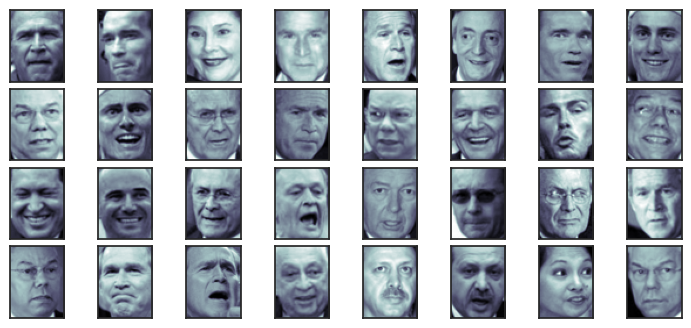

In [41]:
# Lets visualize the original faces
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[0+i].reshape(62, 47), cmap='bone')

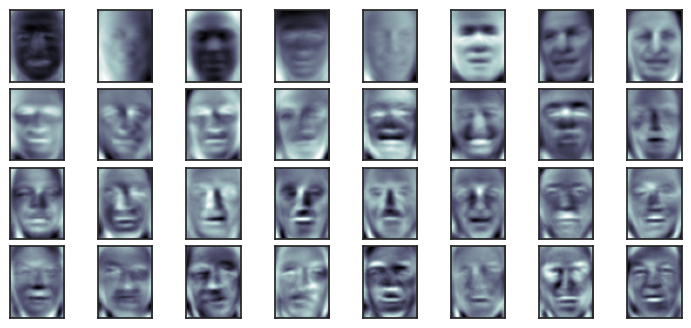

In [42]:
fig, axes = plt.subplots(4, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[0+i].reshape(62, 47), cmap='bone')

Los resultados son muy interesantes y nos dan información sobre cómo varían las imágenes: por ejemplo, las primeras eigenfaces (desde la esquina superior izquierda) parecen estar asociadas con el ángulo de iluminación en el rostro, y los vectores principales posteriores parecen seleccionar ciertas características, como ojos, narices y labios. Echemos un vistazo a la varianza acumulativa de estos componentes para ver cuánta información de los datos preserva la proyección.

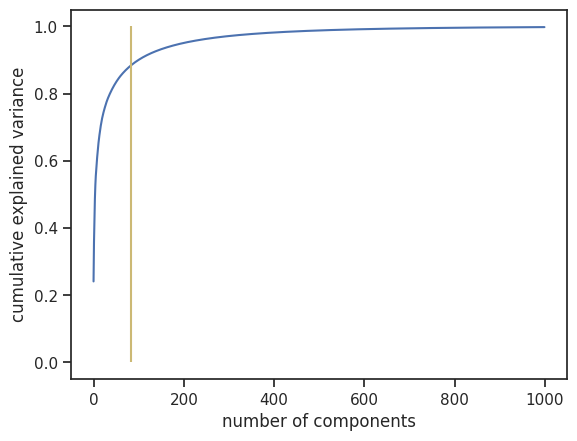

In [44]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(83,0.,1.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
varAcum = np.cumsum(pca.explained_variance_ratio_)

aux = np.where(varAcum>=0.9)
print(varAcum)
print(aux)

[0.24114075 0.3588037  0.42655173 0.48735198 0.52763444 0.55537844
 0.5754075  0.5933398  0.61053586 0.6258782  0.64090055 0.65386045
 0.665701   0.6761072  0.68626463 0.69551307 0.7043661  0.7124492
 0.71982217 0.72668284 0.73268706 0.73857677 0.743975   0.7491744
 0.75397253 0.75870305 0.76324314 0.76765776 0.7719255  0.77598685
 0.77981806 0.7834252  0.78677845 0.79008746 0.7932484  0.7962848
 0.79924613 0.80215245 0.8050155  0.80779374 0.8104799  0.81312853
 0.81574076 0.8182897  0.82073814 0.82312036 0.82547694 0.8277854
 0.830007   0.83217865 0.834336   0.83644176 0.8384951  0.84048456
 0.84244037 0.8443679  0.8462459  0.8480935  0.84984493 0.8515522
 0.85320324 0.8548496  0.8564693  0.85803014 0.85956204 0.8610711
 0.86255527 0.8640087  0.8654313  0.8668494  0.8682366  0.86958855
 0.87090635 0.8722099  0.8734895  0.8747596  0.87601054 0.8772344
 0.87844384 0.879632   0.88078845 0.88192755 0.8830487  0.88415533
 0.88523996 0.8863155  0.8873756  0.88841397 0.8894428  0.8904651
 0.

Vemos que estos 150 componentes representan un poco más del 90% de la varianza. Eso nos llevaría a creer que usando estos 150 componentes recuperaríamos la mayoría de las características esenciales de los datos. Para hacer esto más concreto, podemos comparar las imágenes de entrada con las imágenes reconstruidas a partir de estos 150 componentes.

In [46]:
# Compute the components and projected faces
pca = PCA(n_components = 1000,svd_solver='randomized').fit(faces.data)
Xfaces = faces.data
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

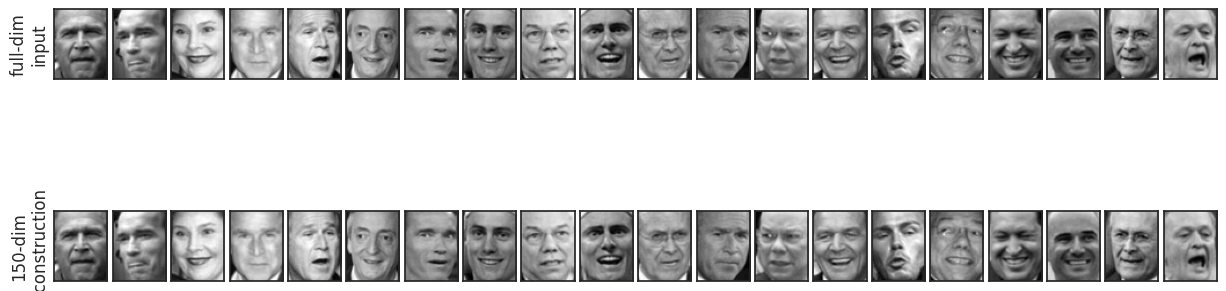

In [47]:
# Plot the results
fig, ax = plt.subplots(2, 20, figsize=(15,5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(20):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

La fila superior muestra las imágenes de entrada, mientras que la fila inferior muestra la reconstrucción de las imágenes a partir de solo 150 de las ~3,000 características iniciales. Esta visualización deja claro por qué la selección de características PCA utilizada en sistemas de reconocimiento facial fue tan exitosa: aunque reduce la dimensionalidad de los datos en casi un factor de 20, las imágenes proyectadas contienen suficiente información como para que, a simple vista, podamos reconocer a las personas en la imagen. Esto significa que nuestro algoritmo de clasificación debe ser entrenado con datos de 150 dimensiones en lugar de datos de 3,000 dimensiones, lo que, dependiendo del algoritmo particular que elijamos, puede llevar a una clasificación mucho más eficiente.

## Resumen del Análisis de Componentes Principales

En este tutorial hemos discutido el uso del análisis de componentes principales para la reducción de dimensionalidad, la visualización de datos de alta dimensionalidad, el filtrado de ruido y la selección de características dentro de datos de alta dimensionalidad. Debido a la versatilidad y capacidad de interpretación del PCA, se ha demostrado que es efectivo en una amplia variedad de contextos y disciplinas. Ante cualquier conjunto de datos de alta dimensionalidad, tiendo a comenzar con PCA para visualizar la relación entre los puntos (como hicimos con los dígitos), entender la principal varianza en los datos (como hicimos con las eigenfaces) y comprender la dimensionalidad intrínseca (mediante la representación de la proporción de varianza explicada). Ciertamente, el PCA no es útil para todos los conjuntos de datos de alta dimensionalidad, pero ofrece un camino directo y eficiente para obtener información sobre datos de alta dimensionalidad.

La principal debilidad del PCA es que tiende a ser altamente afectado por valores atípicos en los datos. Por esta razón, se han desarrollado muchas variantes robustas del PCA, muchas de las cuales actúan para descartar de forma iterativa los puntos de datos que están mal descritos por los componentes iniciales. Scikit-Learn contiene un par de variantes interesantes del PCA, incluyendo RandomizedPCA y SparsePCA, ambos también en el submódulo sklearn.decomposition. RandomizedPCA, que vimos anteriormente, utiliza un método no determinista para aproximar rápidamente los primeros componentes principales en datos de muy alta dimensionalidad, mientras que SparsePCA introduce un término de regularización (ver https://en.wikipedia.org/wiki/Sparse_PCA) que sirve para imponer la dispersión de los componentes.


$\bf{z}$ dimensión $q\times 1 $

$\bf{W}$